# 1. Configuración inicial

In [1]:
from keras.datasets import mnist
from keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [2]:
import warnings
warnings.simplefilter("ignore")

# 2. Cargamos nuestro set de datos

In [3]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
train_data.shape

(60000, 28, 28)

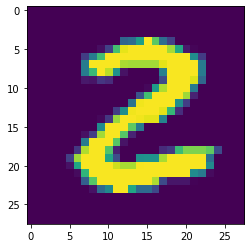

In [5]:
plt.imshow(train_data[25]);

In [6]:
train_labels[25]

2

# 3. Creando nuestro modelo

In [7]:
# Instanciamos el modelo
model = models.Sequential()

# Agregamos unas capas
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

# 4. Compilamos el modelo

In [8]:
# Compilamos
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# 5. Limpieza de datos

In [10]:
# Reducimos el tamaño de nuestra Red Neuronal porque es más fácil trabajar en 2 dimensiones que en 'n' dimensiones
x_train = train_data.reshape((60000,28*28))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [11]:
display(train_labels[0])
display(y_train[0])

5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# 6. Entrenando el modelo

In [12]:
# Entrenando
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2583 - accuracy: 0.9257
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1048 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0686 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0506 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0380 - accuracy: 0.9884


# 7. Evaluando sobre los datos de test

In [13]:
# Evaluamos el modelo
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0649 - accuracy: 0.9802


[0.06493867188692093, 0.9801999926567078]